In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!pip install jsonlines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import jsonlines
import os
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
from scipy import special
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
#Please your own file path for the jsonl file
filepath = '/content/gdrive/MyDrive/sample data/train.jsonl'

In [6]:
#creating the data.txt file
#please use your specific drive location for the data text file

file1 = open('/content/gdrive/MyDrive/sample data/data.txt','w')
with jsonlines.open(filepath) as reader:
  for line in reader:
    for message in line['messages']:
      #print(message)
      #print(type(message))
      file1.write(message+"\n")

In [7]:
#splitting the data into sentences
file_content = open('/content/gdrive/MyDrive/sample data/data.txt').read()
sentences = nltk.sent_tokenize(file_content)

sen = []
for sentence in sentences:
  sent = sentence.split(' ')
  sen = sen + sent

words = nltk.word_tokenize(file_content)
words_lower = nltk.word_tokenize(file_content.lower())

fdist = nltk.FreqDist(words_lower)
freq_of_words = fdist.most_common()


print ('Answer to Problem 4 a) ==> The number of sentences:'+str(len(sentences)))
print ('Answer to Problem 4 b) ==> The number of words after splitting sentences:'+str(len(sen)))
print ('Answer to Problem 4 c) ==> The number of words from raw corpus:'+str(len(words)))
print ('Answer to Problem 4 d) ==> The number of words after lower casing:'+str(len(words_lower)))
print ('                     ) ==> The number of types after lower casing:'+str(len(freq_of_words)))
print ('Answer to Problem 4 e) ==> The first 10 items from raw words', sen[:10])
print ('                       ==> The first 10 items from lower words', words[:10])
print ('                       ==> The first 10 items from lower words', words_lower[:10])
print ('                       ==> The first 10 items from  types', freq_of_words[:10])

print ('Answer to Problem 4 f) ==> The most frequent word type is ', freq_of_words[0][0])
print ('Answer to Problem 4 f) ==> The 10th most frequent word type is ', freq_of_words[9][0])


Answer to Problem 4 a) ==> The number of sentences:17701
Answer to Problem 4 b) ==> The number of words after splitting sentences:263626
Answer to Problem 4 c) ==> The number of words from raw corpus:317582
Answer to Problem 4 d) ==> The number of words after lower casing:317480
                     ) ==> The number of types after lower casing:8776
Answer to Problem 4 e) ==> The first 10 items from raw words ['Germany!', 'Just', 'the', 'person', 'I', 'want', 'to', 'speak', 'with.', 'I']
                       ==> The first 10 items from lower words ['Germany', '!', 'Just', 'the', 'person', 'I', 'want', 'to', 'speak', 'with']
                       ==> The first 10 items from lower words ['germany', '!', 'just', 'the', 'person', 'i', 'want', 'to', 'speak', 'with']
                       ==> The first 10 items from  types [('i', 12914), ('.', 12699), ('to', 11574), (',', 9801), ('you', 9287), ('the', 6524), ('and', 5458), ('a', 4757), ('that', 4662), ('’', 4524)]
Answer to Problem 4 f) =

# This Part is for Bonus Points, The graph is at the end of the execution lines

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128578 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129335 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12484 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129318 missing from current font.
  font

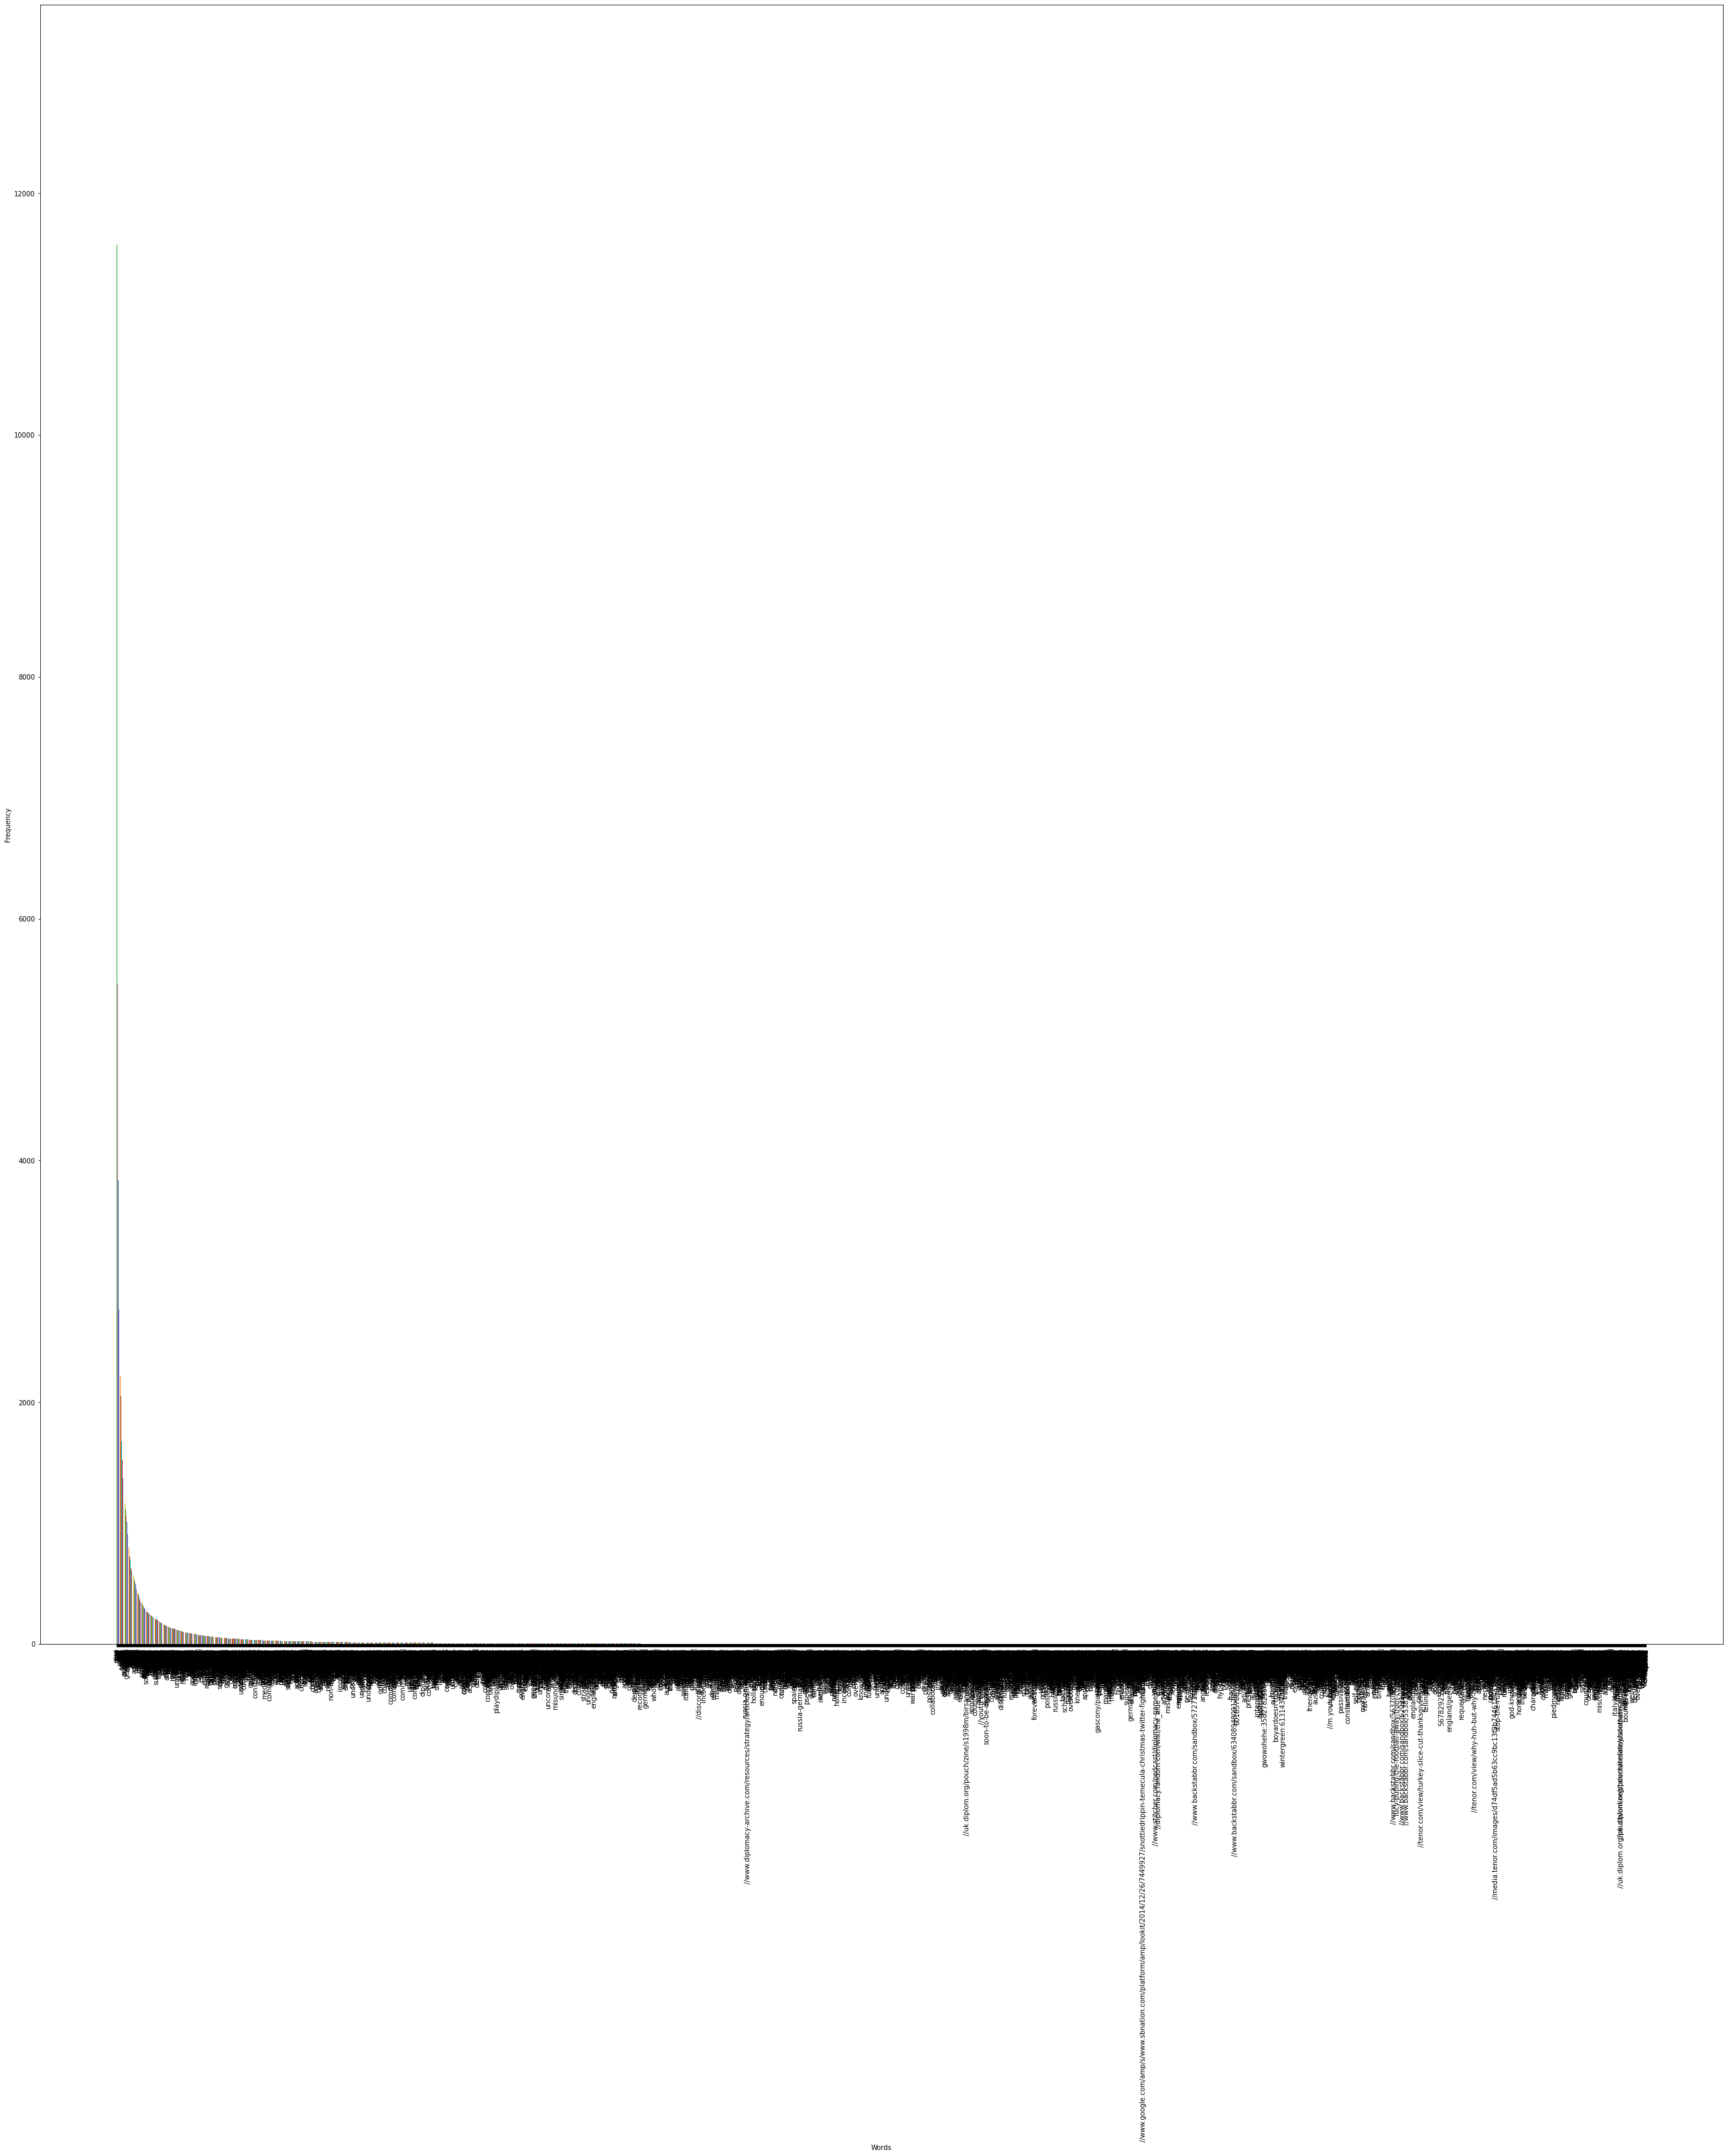

In [8]:
#Calculate zipf and plot the data
plt.figure(figsize=(45,45))  #to increase the plot resolution
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.xticks(rotation=90)    #to rotate x-axis values

for word , freq in freq_of_words:
    plt.bar(word, freq)    
plt.show()
#plt.savefig('/content/gdrive/MyDrive/sample data/zipfl.png')